-----
# **Context**
-----

**WOW Superstore** sells different products like office supplies, furniture and appliances. For each order that is placed, the superstore keeps a record of various attributes related to the product, like state, city, category, subcategory and quantity.

**Each row of the data corresponds to a unique order placed.** The detailed description of the attributes recorded are given below:

-----
## **Data Description**
-----

1. **Order ID:** Unique ID for an order
2. **Ship Mode:** Mode of shipping used for shipment delivery
3. **Segment:** Customer segment product was shipped to
4. **City:** City in which shipment was delivered
5. **State:** State in which the shipment was delivered
6. **Region:** State region
7. **Category:** The category product belongs to
8. **Sub-Category:** Sub-category of the product
9. **Sales:** Sale made in USD
10. **Quantity:** Product quantity
11. **Discount:** Discount given on the product
12. **Profit:** Profit/loss made on the sale

### **We will first import the Python libraries needed for our analysis**

In [ ]:
# Load the Pandas library with alias 'pd' - to import and analyze tabular data
import pandas as pd

# Load the Seaborn library with alias 'sns' -to create visualizations
import seaborn as sns

### **Let's load the data into a pandas dataframe for analysis**

When you specify a filename to *pandas.read_csv()*, Python will look in your current working directory. Your working directory is typically the directory that you started your Python process or Jupyter notebook from.

In [ ]:
# Read data from file 'WOW Superstore.csv' 
# (in the same directory that your python process is based)

data = pd.read_csv("WOW Superstore.csv")

### **Before we begin our analysis, let's take a quick look at our data to get a feel for it**

* We can check the first 5 rows of the data using the *head()* function.

In [ ]:
data.head()

,Order ID,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,WOWID0001,Standard Class,Consumer,Seattle,Washington,West,Office Supplies,Binders,407.976,3,0.2,132.5922
1,WOWID0002,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
2,WOWID0003,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
3,WOWID0004,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
4,WOWID0005,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Binders,9.618,2,0.7,-7.0532


* We can check the last 5 rows of the data using the *tail()* function.

In [ ]:
data.tail()

,Order ID,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1945,WOWID1946,Standard Class,Corporate,Philadelphia,Pennsylvania,East,Office Supplies,Paper,3.4240,1,0.20,1.0700
1946,WOWID1947,Standard Class,Corporate,Philadelphia,Pennsylvania,East,Technology,Accessories,151.2000,3,0.20,32.1300
1947,WOWID1948,First Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,65.5840,2,0.20,23.7742
1948,WOWID1949,First Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
1949,WOWID1950,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Envelopes,99.5680,2,0.20,33.6042


* We can check a **random sample** of rows of the data using the *sample()* function.
* We will set the *n* parameter to 5 to display 5 random rows.
* Note that **the sample rows displayed will change each time we execute the code,** since a random selection is executed.

In [ ]:
data.sample(n=5)

,Order ID,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1559,WOWID1560,Standard Class,Consumer,Huntsville,Texas,Central,Office Supplies,Art,12.736,4,0.2,2.2288
1041,WOWID1042,First Class,Home Office,Houston,Texas,Central,Furniture,Tables,200.795,1,0.3,-22.9480
637,WOWID0638,Standard Class,Consumer,Seattle,Washington,West,Technology,Phones,107.984,1,0.2,9.4486
1239,WOWID1240,First Class,Consumer,Austin,Texas,Central,Office Supplies,Binders,4.276,1,0.8,-6.6278
231,WOWID0232,Standard Class,Corporate,Philadelphia,Pennsylvania,East,Furniture,Furnishings,17.024,2,0.2,1.7024


**What does this quick look at our data tell us?**

* Two modes of shipping are visible - *Standard Class* and *First Class*.
* Three customer segments are visible - *Consumer*, *Corporate*, and *Home Office*.
* The customers are spread across different cities and states of the US.
* The products ordered belong to various categories like *Office Supplies*, *Furniture*, *Technology* etc.
* The discounts provided range from 20% to 80%.
* The *Profit* column has negative values too, indicating losses incurred.

This, of course, is true **only for this snapshot of 15 rows** that we have just seen. We have some very handy fuctions in Pandas to do a thorough summary analysis of the entire data without having to view all the rows. 

### **Now that we have taken a quick look at our data, let's check the number of rows and columns in the data, and what type of values we are going to deal with**

* The *shape* attribute and the *info()* function will help us with this.

In [ ]:
# checking the shape of the data
data.shape

(1950, 12)

* We see that there are 1950 rows and 12 columns in the data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1950 non-null   object 
 1   Ship Mode     1950 non-null   object 
 2   Segment       1950 non-null   object 
 3   City          1950 non-null   object 
 4   State         1950 non-null   object 
 5   Region        1950 non-null   object 
 6   Category      1950 non-null   object 
 7   Sub-Category  1950 non-null   object 
 8   Sales         1950 non-null   float64
 9   Quantity      1950 non-null   int64  
 10  Discount      1950 non-null   float64
 11  Profit        1950 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 182.9+ KB


- There are columns of different types in the data.
- *Sales*, *Discount*, and *Profit* are *float* type columns.
- *Quantity* is an *int* type column.
- The rest of the columns are of the *object* data type.

### **We now know how many and what type of values we are going to deal with. It's time to proceed with our analysis.**

#### Summary statistics are a good place to start an analysis. Pandas provides a neat statistical summary of the data through the *describe()* function. Let's take a look at it.

In [ ]:
data.describe()

,Sales,Quantity,Discount,Profit
count,1950.000000,1950.000000,1950.000000,1950.000000
mean,192.301891,3.746154,0.311046,-8.701654
std,541.179175,2.144994,0.244929,236.981216
min,0.444000,1.000000,0.000000,-3701.892800
25%,12.624000,2.000000,0.200000,-12.434725
50%,41.424000,3.000000,0.200000,1.823600
75%,173.304000,5.000000,0.400000,10.258850
max,13999.960000,14.000000,0.800000,6719.980800


- The sale amount of products varies from 0.44 to ~14000 dollars.
- The order quantity varies from 1 to 14 units.
- The discount on products varies from 0 to 80%.
- The *Profit* column has negative values, indicating losses incurred.

# <font color='blue'>Question:</font>

### What is the average discount offered across all orders?

1. Approx. 31%
2. Approx. 24.5%
3. Approx. 20%
4. Approx. 80%

* The above summary shows only the numerical columns.
* Can we include the non-numerical columns too? - YES! Let's set the *include* parameter of the *describe()* function to *'all'*.
* We will also transpose the data using the *T* attribute to make it easier to view the whole summary at once.

In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order ID,1950,1950,WOWID0636,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,1950,2,Standard Class,1562,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,1950,3,Consumer,1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1950,105,Philadelphia,437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,1950,4,Texas,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,1950,3,Central,1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,1950,3,Office Supplies,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-Category,1950,17,Binders,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,1950.0,NaN,NaN,NaN,192.301891,541.179175,0.444,12.624,41.424,173.304,13999.96
Quantity,1950.0,NaN,NaN,NaN,3.746154,2.144994,1.0,2.0,3.0,5.0,14.0


- There are two shipment modes, '*Standard Class*' being the more frequent one.
- Orders were shipped across 3 regions, 4 states, and 105 cities. '*Philadelphia*' was the most frequent city for shipping.
- The products are spread across 3 categories and 17 sub-categories.

# <font color='blue'>Question:</font>

### How many distinct segments of customers are present in the data?

1. 2
2. 3
3. 4
4. 5

### **The statistical summary was really helpful. The next step would be to analyze some of the columns individually to see if we can gain more insights.**

### **We will begin with the categorical variables in the data.**

* Let's check the unique value in the *Category* column.
* The Pandas *unique()* function will help us here.

In [ ]:
data["Category"].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

* Let's check the number of orders corresponding to each unique value in the *Category* column.
* The *value_counts()* function in Pandas allows us to do this.

In [ ]:
data["Category"].value_counts()

Office Supplies    1200
Furniture           411
Technology          339
Name: Category, dtype: int64

**Observations**

- There are 3 categories of products.
- Most of the orders are for products under the category *Office Supplies*.

**Let's check the unique value in the *State* column.**

In [ ]:
data["State"].unique()

array(['Washington', 'Texas', 'Pennsylvania', 'Illinois'], dtype=object)

**Let's check the number of orders corresponding to each unique value of the *State* column.**

In [ ]:
data["State"].value_counts()

Texas           746
Pennsylvania    480
Illinois        362
Washington      362
Name: State, dtype: int64

# <font color='blue'>Question:</font>

### Which state were most of the orders placed from?

1. Texas
2. Pennsylvania
3. Illinois
4. Washington

### **Now let's analyze some of the numerical variables in the data.**

* Let's check the average profit across all the orders.
* The *mean()* function can be used for this.

In [ ]:
data["Profit"].mean()

-8.701654102564095

* Let's check the maximum profit across all the orders.
* The *max()* function can be used for this.

In [ ]:
data["Profit"].max()

6719.9808

* Let's check the minimum profit across all the orders.
* The *min()* function can be used for this.

In [ ]:
data["Profit"].min()

-3701.8928

**Observations**

* On an average, the orders have resulted in a loss of 8.7 dollars to the superstore.
* The maximum profit made was ~6720 dollars, while the maximum loss incurred was ~3700 dollars.

### **That gives us an overall idea of how the superstore is performing in financial terms. Let's dig a little deeper now.**

* Let's check the average profit across the different product categories and different states.
* To do so, we will have to first group the data with respect to a particular variable and then check the average profit.
* The *groupby()* function in Pandas will help us group the data with respect to a particular variable.

In [ ]:
# checking the average profit across the different product categories
data.groupby("Category")["Profit"].mean()

Category
Furniture         -35.104347
Office Supplies   -15.013882
Technology         45.652861
Name: Profit, dtype: float64

* Products under the *Furniture* category result in more losses on average, while products under the *Technology* category result in more profits on average.

In [ ]:
# checking the average profit across the different states
data.groupby("State")["Profit"].mean().sort_values(ascending=False)

State
Washington      73.147109
Pennsylvania   -22.256420
Texas          -29.389154
Illinois       -29.944996
Name: Profit, dtype: float64

* Here we also sorted the data in descending order of values using the *sort_values()* function.
* Orders placed from the state of Washington result in more profits on average, while those placed from the state of Illinois result in more losses on average.

### **We saw that the orders placed from the state of Washington result in more profits. Lets see the distribution of product categories across the different states to gain more insights.**

* We will use the *crosstab()* function of pandas to check the the distribution of product categories across the different states.

In [ ]:
data_cross = pd.crosstab(data["State"], data["Category"])
data_cross

Category,Furniture,Office Supplies,Technology
State,,,
Illinois,91,216,55
Pennsylvania,96,290,94
Texas,150,471,125
Washington,74,223,65


* We can display the above crosstab in a more visually appealing manner using a heatmap.
* The *heatmap()* function in the Seaborn library will help us do so.

<AxesSubplot:xlabel='Category', ylabel='State'>

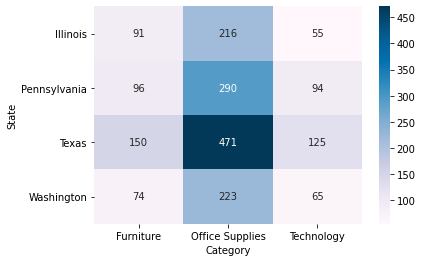

In [ ]:
sns.heatmap(data_cross, annot=True, fmt=".0f", cmap="PuBu")

* Most orders are for office supplies across all the states, where Texas has the highest number of orders.
* The distribution of *Furniture* and *Technology* products are similar for all states except Illinois.

### **We can communicate our insights in a clearer and more visually appealing manner with visualizations instead of numbers.**

#### Let's visualize the data a little more.

* Pair plots are a very informative type of visualization for numerical variables.
* Let's see what insights we can get from it.

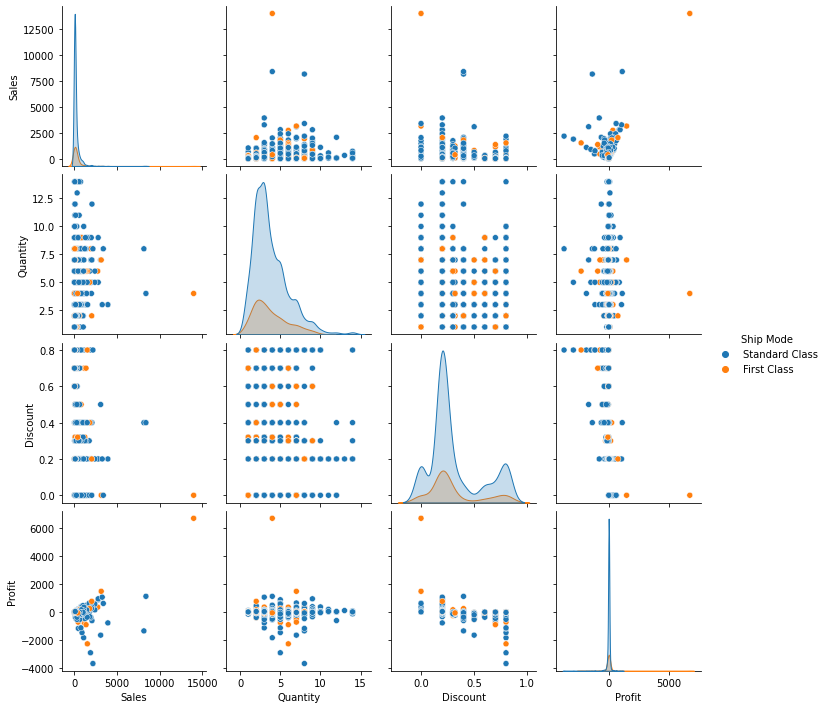

In [ ]:
# list of numerical columns in the data
numerical_columns = ["Sales", "Quantity", "Discount", "Profit"]

sns.pairplot(data=data, vars=numerical_columns, diag_kind="kde", hue="Ship Mode")

* We can see that a lot of orders are clustered between a profit or loss of 1000 dollars.
* We can see that the distribution of the variables is similar for both shipment modes, but the number of orders are more for *Standard Class* shipping.
* We had seen that the maximum profit made was ~6720 dollars, and the above plot shows that the order was shipped under *First Class*.

# <font color='blue'>Question:</font>

### We had seen that the maximum loss incurred was ~3700 dollars. Which shipping mode does that order correspond to?

1. Standard Class
2. First Class

## Summary
**Data description**
* The dataset has **1950 observations and 12 columns.**
* Sales, Discount, Profit, and Quantity are numerical columns while the rest are of the object datatype.

**Insights from data exploration**
* The sale amount of products varies from 0.44 to ~14000 dollars.
* The minimum discount offered by the Superstore is 0% while the maximum is 80%.
* The Profit column has negative values, indicating losses incurred.
* 'Standard Class' is the most frequent mode of shipment and 'Philadelphia' is the most frequent city for shipping.
* The products are spread across 3 categories and 17 sub-categories.
* The orders are spread over 4 states - most of the orders are placed from the state of Texas and most orders are for office supplies.
* Products under the Furniture category result in more losses on average, while Technology products tend to result in more profits.
* Orders placed from the state of Washington result in more profits on average, while those placed from Illinois result in more losses.